# Capstone Project
### Exploring the relationship between housing prices in Toronto and venues in the neighborhood
Anna Cybulsky

## Part 2 - Analyzing the Dataset

In [2]:
import requests
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [3]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geographiclib-1.50   | 34 KB     | ##################################### | 100% 
g

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          73 KB

The following NEW packages will be INSTALLED:

  folium             conda-forge/noarch::folium-0.5.0-py_0
  vincent            conda-forge/noarch::vincent-0.4.4-py_1



vin

In [5]:
# Import Houses Data from Part 1
houses = pd.read_csv('data-coordinates-final.csv', index_col=0)
houses.head()
houses.shape

(7025, 10)

In [6]:
# Import Neighborhoods Data from previous assignment
hoods = pd.read_csv('neighborhood-data.csv')
hoods.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [7]:
hoods.shape

(103, 5)

### Cluster the houses into Toronto neighborhoods using K means

In [8]:
houses_clustering = houses[['lat','long']]
houses_clustering.head()

,lat,long
0,43.647028,-79.531004
1,43.596934,-79.509620
2,43.713951,-79.403311
3,43.664533,-79.461348
4,43.739059,-79.303981


In [9]:
# the neighborhoods lat & long coordinate will be used as the centroids for K means
centroids = hoods[['Latitude','Longitude']]
centroids.head()

,Latitude,Longitude
0,43.753259,-79.329656
1,43.725882,-79.315572
2,43.654260,-79.360636
3,43.718518,-79.464763
4,43.662301,-79.389494


In [10]:
# Use K-MEANS to cluster the houses into their neighborhoods
# set number of clusters to number of neighborhoods
# run k-means clustering
kmeans = KMeans(n_clusters=103, init=centroids)
kmeans.fit(houses_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:]

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (99) found smaller than n_clusters (103). Possibly due to duplicate points in X.
  return_n_iter=True)


array([11, 88, 73, ..., 58, 12, 58], dtype=int32)

In [11]:
labels=kmeans.labels_[:]

In [12]:
houses['cluster']=labels

In [13]:
houses.groupby('cluster').count()

,final_price,list_price,bedrooms,bathrooms,sqft,parking,type,full_address,lat,long
cluster,,,,,,,,,,
0,74,74,74,74,21,74,74,74,74,74
1,42,42,42,42,11,42,42,42,42,42
2,73,73,73,73,25,73,73,73,73,73
3,31,31,31,31,2,31,31,31,31,31
4,52,52,52,52,14,52,52,52,52,52
5,56,56,56,56,17,56,56,56,56,56
6,65,65,65,65,16,65,65,65,65,65
7,27,27,27,27,6,27,27,27,27,27
8,100,100,100,100,31,100,100,100,100,100


In [14]:
hoods_join=hoods.drop(['Latitude','Longitude'], axis=1)

In [15]:
# Add Neighborhood to Houses Data
houses = houses.join(hoods_join, on='cluster')
houses.head()

,final_price,list_price,bedrooms,bathrooms,sqft,parking,type,full_address,lat,long,cluster,Postal Code,Borough,Neighborhood
0,885000.0,898000.0,3.00,2.0,NaN,6.0,2,"2 Cabot Crt, Toronto",43.647028,-79.531004,11,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov..."
1,825513.0,839000.0,2.00,2.0,NaN,1.0,3,"61 Twelfth St, Toronto",43.596934,-79.509620,88,M8V,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores"
2,2700000.0,2798000.0,4.00,5.0,3000.0,2.0,3,"110 Albertus Ave, Toronto",43.713951,-79.403311,73,M4R,Central Toronto,"North Toronto West, Lawrence Park"
3,1057000.0,1079000.0,3.51,2.0,NaN,1.0,2,"342 Indian Road Cres, Toronto",43.664533,-79.461348,69,M6P,West Toronto,"High Park, The Junction South"
4,1530000.0,1399900.0,4.52,5.0,3500.0,4.0,3,"77 Inniswood Dr, Toronto",43.739059,-79.303981,1,M4A,North York,Victoria Village


**Let's consider only neighborhoods in Toronto borough**

In [16]:
houses_to=houses[houses['Borough'].str.contains('Toronto')].reset_index(drop=True)
houses_to.shape

(2143, 14)

In [17]:
houses_to.groupby('Neighborhood').count()

,final_price,list_price,bedrooms,bathrooms,sqft,parking,type,full_address,lat,long,cluster,Postal Code,Borough
Neighborhood,,,,,,,,,,,,,
Berczy Park,1,1,1,1,0,1,1,1,1,1,1,1,1
"Brockton, Parkdale Village, Exhibition Place",72,72,72,72,28,72,72,72,72,72,72,72,72
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",125,125,125,125,41,125,125,125,125,125,125,125,125
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",1,1,1,1,0,1,1,1,1,1,1,1,1
Central Bay Street,40,40,40,40,8,40,40,40,40,40,40,40,40
Christie,76,76,76,76,18,76,76,76,76,76,76,76,76
Church and Wellesley,28,28,28,28,8,28,28,28,28,28,28,28,28
Davisville,77,77,77,77,21,77,77,77,77,77,77,77,77
Davisville North,65,65,65,65,17,65,65,65,65,65,65,65,65


In [18]:
#Let's drop the neighborhoods that have less than 30 houses data
counts = houses_to['Neighborhood'].value_counts()
houses_to = houses_to[~houses_to['Neighborhood'].isin(counts[counts < 30].index)]
houses_to.reset_index(inplace=True)
houses_to.shape

(2069, 15)

In [19]:
houses_to.head()

,index,final_price,list_price,bedrooms,bathrooms,sqft,parking,type,full_address,lat,long,cluster,Postal Code,Borough,Neighborhood
0,0,2700000.0,2798000.0,4.00,5.0,3000.0,2.0,3,"110 Albertus Ave, Toronto",43.713951,-79.403311,73,M4R,Central Toronto,"North Toronto West, Lawrence Park"
1,1,1057000.0,1079000.0,3.51,2.0,NaN,1.0,2,"342 Indian Road Cres, Toronto",43.664533,-79.461348,69,M6P,West Toronto,"High Park, The Junction South"
2,2,2250000.0,1990000.0,3.51,4.0,3000.0,2.0,2,"22 Amelia St, Toronto",43.667562,-79.368202,96,M4X,Downtown Toronto,"St. James Town, Cabbagetown"
3,3,1240000.0,1249000.0,3.00,2.0,2000.0,0.0,2,"131 Palmerston Ave, Toronto",43.650732,-79.407913,84,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park"
4,4,1300000.0,1189000.0,3.51,4.0,1500.0,2.0,2,"110 Walpole Ave, Toronto",43.675152,-79.324887,100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."


### Create a map with the Neighborhood House Clusters

In [20]:
# Get Toronto coordinates
geolocator = Nominatim(user_agent="TO_explorer")
location_TO = geolocator.geocode('Toronto, Ontario')
latitude_TO = location_TO.latitude
longitude_TO = location_TO.longitude

In [21]:
#smaller dataset for the map to render
houses_t=houses_to.iloc[0:1000]

In [22]:
# create map
map_clusters = folium.Map(location=[latitude_TO, longitude_TO], zoom_start=12)
kclusters=103

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, address, cluster, neighborhood in zip(houses_t['lat'], houses_t['long'], houses_t['full_address'], houses_t['cluster'], houses_t['Neighborhood']):
    label = '{}, {}'.format(address, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Explore Price Data by Neighboorhood

final_price    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

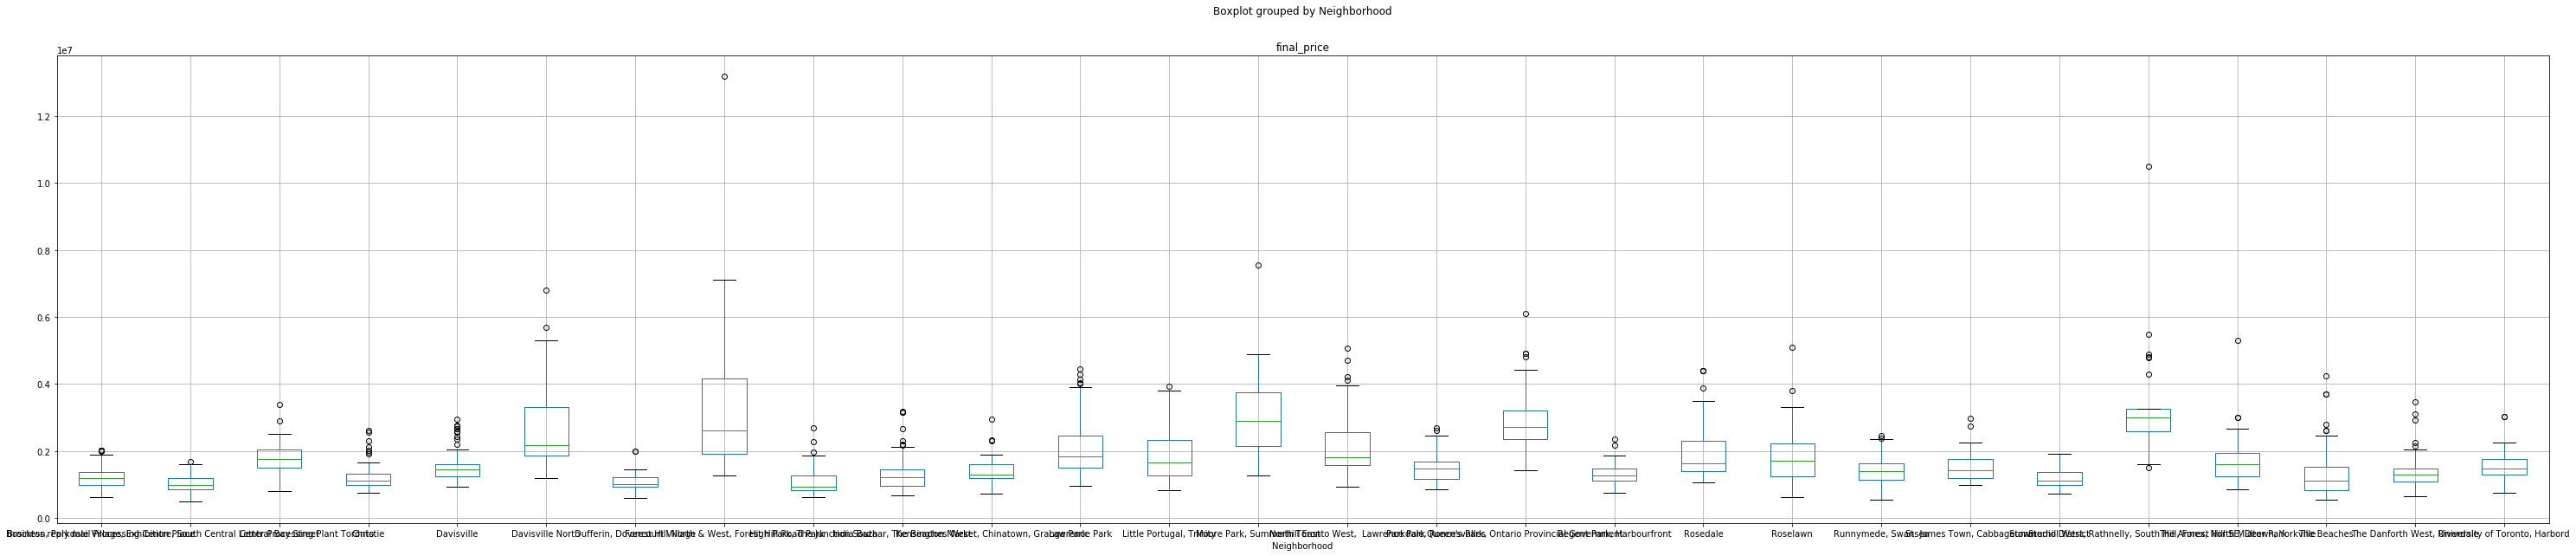

In [23]:
houses_to.boxplot(column='final_price', by='Neighborhood', figsize=(50,10), return_type='axes')

It can be seen that the prices do differ by neighborhood.
Let's check the correlation of the house price with some of its characteristics. 

In [24]:
df_corr=houses_to[['final_price','list_price','bedrooms','bathrooms','parking','sqft','type']]

In [25]:
df_corr.corr()

,final_price,list_price,bedrooms,bathrooms,parking,sqft,type
final_price,1.000000,0.988715,0.520764,0.714395,0.434566,0.038079,0.361581
list_price,0.988715,1.000000,0.508658,0.716424,0.442706,0.035461,0.371733
bedrooms,0.520764,0.508658,1.000000,0.576177,0.299215,0.034831,0.269378
bathrooms,0.714395,0.716424,0.576177,1.000000,0.408849,0.057405,0.278976
parking,0.434566,0.442706,0.299215,0.408849,1.000000,0.032546,0.337480
sqft,0.038079,0.035461,0.034831,0.057405,0.032546,1.000000,-0.030106
type,0.361581,0.371733,0.269378,0.278976,0.337480,-0.030106,1.000000


It looks like the number of bedrooms and bathrooms have the biggest influence on price.
However, based on the plots from Part 1, I don't feel that we can easily normalize the data with respect to one or two characteristics, since the relationships are not linear. 
Let's keep the data as is for clustering. 

### Get the Foursquare Venue Data

In [37]:
#Foursquare Credentials
CLIENT_ID = 'R5AUUCVQRM4SY0II2JQ5JQMRCTUO1POIL2YYRUEV0E11KFLS' # your Foursquare ID
CLIENT_SECRET = 'LNVQ22X0AFDWGP35DNMT1BCNSSUZHDL0XQXUNU1HE0FFFQTE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R5AUUCVQRM4SY0II2JQ5JQMRCTUO1POIL2YYRUEV0E11KFLS
CLIENT_SECRET:LNVQ22X0AFDWGP35DNMT1BCNSSUZHDL0XQXUNU1HE0FFFQTE


In [38]:
# Define the function to get venues with Foursquare

def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
hoods_to=hoods[hoods['Borough'].str.contains('Toronto')].reset_index(drop=True)
hoods_to.shape

(39, 5)

In [40]:
# Call the function to get the venues for each neighborhood
LIMIT=100
toronto_venues = getNearbyVenues(names=hoods_to['Neighborhood'],
                                   latitudes=hoods_to['Latitude'],
                                   longitudes=hoods_to['Longitude'],
                                 radius=400
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


In [41]:
toronto_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Airport,1,1,1,1,1,1
Airport Food Court,1,1,1,1,1,1
Airport Lounge,2,2,2,2,2,2
Airport Service,1,1,1,1,1,1
Airport Terminal,2,2,2,2,2,2
American Restaurant,14,14,14,14,14,14
Aquarium,5,5,5,5,5,5
Art Gallery,8,8,8,8,8,8
Arts & Crafts Store,2,2,2,2,2,2


**Let's create more general venue categories by grouping together similar categories before clustering**

In [42]:
restaurant=toronto_venues['Venue Category'].str.contains('Restaurant')
store=toronto_venues['Venue Category'].str.contains('Store')
shop=toronto_venues['Venue Category'].str.contains('Shop')
bar=toronto_venues['Venue Category'].str.contains('Bar')
pub=toronto_venues['Venue Category'].str.contains('Pub')
brewery=toronto_venues['Venue Category'].str.contains('Brewery')
pizza=toronto_venues['Venue Category'].str.contains('Pizza')
place=toronto_venues['Venue Category'].str.contains('Place')
joint=toronto_venues['Venue Category'].str.contains('Joint')
gym=toronto_venues['Venue Category'].str.contains('Fitness')
steak=toronto_venues['Venue Category'].str.contains('Steak')
diner=toronto_venues['Venue Category'].str.contains('Diner')
yoga=toronto_venues['Venue Category'].str.contains('Yoga')
cafe=toronto_venues['Venue Category'].str.contains('Café')
tea=toronto_venues['Venue Category'].str.contains('Tea')
breakfast=toronto_venues['Venue Category'].str.contains('Breakfast')
gastropub=toronto_venues['Venue Category'].str.contains('Gastropub')
store2=toronto_venues['Venue Category'].str.contains('store')

In [43]:
grocery=toronto_venues['Venue Category'].str.contains('Grocery')

In [44]:
print('restaurant counts:', restaurant.value_counts())
print('store counts:', store.value_counts())
print('shop counts:', shop.value_counts())
print('grocery counts:', grocery.value_counts())

restaurant counts: False    936
True     316
Name: Venue Category, dtype: int64
store counts: False    1193
True       59
Name: Venue Category, dtype: int64
shop counts: False    1035
True      217
Name: Venue Category, dtype: int64
grocery counts: False    1244
True        8
Name: Venue Category, dtype: int64


In [45]:
# Add a new column with the general category name
toronto_venues['General Category']=toronto_venues['Venue Category']

In [49]:
toronto_venues.loc[restaurant, 'General Category']='Restaurant'
toronto_venues.loc[store, 'General Category']='Store / Shop'
toronto_venues.loc[shop, 'General Category']='Store / Shop'
toronto_venues.loc[bar, 'General Category']='Bar / Pub'

In [50]:
toronto_venues.loc[pub, 'General Category']='Bar / Pub'
toronto_venues.loc[brewery, 'General Category']='Bar / Pub'
toronto_venues.loc[pizza, 'General Category']='Restaurant'
toronto_venues.loc[place, 'General Category']='Restaurant'
toronto_venues.loc[joint, 'General Category']='Restaurant'
toronto_venues.loc[gym, 'General Category']='Gym'

In [51]:
toronto_venues.loc[steak, 'General Category']='Restaurant'
toronto_venues.loc[diner, 'General Category']='Restaurant'
toronto_venues.loc[yoga, 'General Category']='Gym'
toronto_venues.loc[cafe, 'General Category']='Café / Tea'
toronto_venues.loc[tea, 'General Category']='Café / Tea'
toronto_venues.loc[breakfast, 'General Category']='Restaurant'
toronto_venues.loc[gastropub, 'General Category']='Bar / Pub'
toronto_venues.loc[store2, 'General Category']='Store / Shop'

In [52]:
toronto_venues['General Category'].value_counts()

Restaurant               458
Store / Shop             281
Bar / Pub                116
Café / Tea                85
Gym                       36
Hotel                     27
Bakery                    25
Park                      22
Deli / Bodega             16
Bank                      13
Art Gallery                8
Concert Hall               7
Pharmacy                   6
Lounge                     5
Spa                        5
Theater                    5
Aquarium                   5
Jazz Club                  4
Garden                     4
Plaza                      4
Fountain                   4
Distribution Center        4
Building                   4
Music Venue                4
General Travel             4
Dance Studio               3
Neighborhood               3
Creperie                   3
Nightclub                  3
Farmers Market             3
                        ... 
College Rec Center         1
Airport Service            1
Event Space                1
Gas Station   

In [38]:
#Let's drop the venues that have less than 6 counts
#counts = toronto_venues['General Category'].value_counts()
#venues = toronto_venues[~toronto_venues['General Category'].isin(counts[counts < 6].index)]
#venues.reset_index(inplace=True)
#venues.shape

(1093, 9)

In [122]:
#Let's rename the venue categories that have less than 6 counts into an "Other" category
counts = toronto_venues['General Category'].value_counts()
toronto_venues['General Category'][toronto_venues['General Category'].isin(counts[counts < 6].index)]="Other"
venues=toronto_venues

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,General Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop,Store / Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot,Restaurant
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center,Other
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa,Other


In [124]:
venues['General Category'].value_counts()

Restaurant       458
Store / Shop     281
Other            152
Bar / Pub        116
Café / Tea        85
Gym               36
Hotel             27
Bakery            25
Park              22
Deli / Bodega     16
Bank              13
Art Gallery        8
Concert Hall       7
Pharmacy           6
Name: General Category, dtype: int64

Now we have much less category types for the clustering analysis

In [125]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,General Category
Neighborhood,,,,,,,
Berczy Park,17,17,17,17,17,17,17
"Brockton, Parkdale Village, Exhibition Place",16,16,16,16,16,16,16
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",11,11,11,11,11,11,11
Central Bay Street,75,75,75,75,75,75,75
Christie,11,11,11,11,11,11,11
Church and Wellesley,54,54,54,54,54,54,54
"Commerce Court, Victoria Hotel",100,100,100,100,100,100,100
Davisville,26,26,26,26,26,26,26


In [126]:
# one hot encoding
toronto_onehot = pd.get_dummies(venues[['General Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = venues['Neighborhood'] 

toronto_onehot.head()

,Art Gallery,Bakery,Bank,Bar / Pub,Café / Tea,Concert Hall,Deli / Bodega,Gym,Hotel,Other,Park,Pharmacy,Restaurant,Store / Shop,Neighborhood
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront"
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"Regent Park, Harbourfront"
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"Regent Park, Harbourfront"
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"Regent Park, Harbourfront"
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"Regent Park, Harbourfront"


In [127]:
#move neighborhood to first column
toronto_onehot = toronto_onehot[ ['Neighborhood'] + [ col for col in toronto_onehot.columns if col != 'Neighborhood' ] ]
toronto_onehot.head()

,Neighborhood,Art Gallery,Bakery,Bank,Bar / Pub,Café / Tea,Concert Hall,Deli / Bodega,Gym,Hotel,Other,Park,Pharmacy,Restaurant,Store / Shop
0,"Regent Park, Harbourfront",0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [128]:
# Take the mean of the number of venue types for each neighborhood
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Art Gallery,Bakery,Bank,Bar / Pub,Café / Tea,Concert Hall,Deli / Bodega,Gym,Hotel,Other,Park,Pharmacy,Restaurant,Store / Shop
0,Berczy Park,0.0,0.0,0.00,0.176471,0.0000,0.058824,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.411765,0.235294
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.0,0.00,0.062500,0.1875,0.000000,0.000000,0.062500,0.000000,0.187500,0.000000,0.000000,0.250000,0.250000
2,"Business reply mail Processing Centre, South C...",0.0,0.0,0.00,0.062500,0.0000,0.000000,0.000000,0.062500,0.000000,0.500000,0.062500,0.000000,0.250000,0.062500
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.0,0.00,0.090909,0.0000,0.000000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.0,0.0,0.04,0.026667,0.0800,0.000000,0.013333,0.013333,0.013333,0.026667,0.013333,0.013333,0.453333,0.306667


## Cluster the Neighborhoods, by Venues and by Housing Data

#### Cluster the Neighborhoods based on Venues

In [135]:
# Use K-MEANS to cluster the neighborhoods based on the venues
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=12, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:]

array([0, 3, 4, 1, 0, 3, 0, 0, 0, 3, 3, 0, 4, 0, 0, 2, 0, 0, 0, 4, 2, 3,
       3, 0, 1, 1, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 0], dtype=int32)

In [136]:
# add clustering labels
toronto_grouped['Cluster']=kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
venues_merged = venues.join(toronto_grouped.set_index('Neighborhood'), on='Neighborhood')

#venues_merged.drop(['index'],axis=1,inplace=True)

#venues_merged.groupby('Cluster').count()
toronto_grouped.groupby('Cluster').count()

,Neighborhood,Art Gallery,Bakery,Bank,Bar / Pub,Café / Tea,Concert Hall,Deli / Bodega,Gym,Hotel,Other,Park,Pharmacy,Restaurant,Store / Shop
Cluster,,,,,,,,,,,,,,,
0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [137]:
toronto_grouped.groupby('Cluster').mean()

,Art Gallery,Bakery,Bank,Bar / Pub,Café / Tea,Concert Hall,Deli / Bodega,Gym,Hotel,Other,Park,Pharmacy,Restaurant,Store / Shop
Cluster,,,,,,,,,,,,,,
0,0.006098,0.017361,0.009010,0.096481,0.065729,0.006275,0.0085,0.026095,0.015935,0.093757,0.017878,0.007465,0.402565,0.226850
1,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.0000,0.000000,0.000000,0.977273,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.000000,0.032353,0.031552,0.067249,0.075477,0.000000,0.0000,0.053768,0.000000,0.106059,0.031552,0.010417,0.220748,0.370826
4,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.0000,0.104167,0.000000,0.500000,0.187500,0.000000,0.166667,0.020833


In [138]:
toronto_grouped.loc[toronto_grouped.Cluster==0, 'Venue Cluster']='Most Venue Types'
toronto_grouped.loc[toronto_grouped.Cluster==1, 'Venue Cluster']='Few Venues'
toronto_grouped.loc[toronto_grouped.Cluster==2, 'Venue Cluster']='Park Only'
toronto_grouped.loc[toronto_grouped.Cluster==3, 'Venue Cluster']='Many Venue Types'
toronto_grouped.loc[toronto_grouped.Cluster==4, 'Venue Cluster']='Some Venue Types'
toronto_clusters=toronto_grouped[['Neighborhood','Cluster','Venue Cluster']]
toronto_clusters.head()

,Neighborhood,Cluster,Venue Cluster
0,Berczy Park,0,Most Venue Types
1,"Brockton, Parkdale Village, Exhibition Place",3,Many Venue Types
2,"Business reply mail Processing Centre, South C...",4,Some Venue Types
3,"CN Tower, King and Spadina, Railway Lands, Har...",1,Few Venues
4,Central Bay Street,0,Most Venue Types


#### Create a map to visualize the Venue-based Neighborhood Clusters

In [139]:
# create map
map_clusters = folium.Map(location=[latitude_TO, longitude_TO], zoom_start=12)
kclusters=5

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, venue_type, cluster, neighborhood in zip(venues_merged['Venue Latitude'], venues_merged['Venue Longitude'], venues_merged['General Category'], venues_merged['Cluster'], venues_merged['Neighborhood']):
    label = '{}, {}'.format(venue_type, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [140]:
house_prices=houses_to.groupby('Neighborhood').mean()
house_prices.drop(['index','cluster'],axis=1, inplace=True)
house_prices.reset_index(inplace=True)
house_prices.head()

,Neighborhood,final_price,list_price,bedrooms,bathrooms,sqft,parking,type,lat,long
0,"Brockton, Parkdale Village, Exhibition Place",1.224481e+06,1.107814e+06,3.651389,2.402778,2160.714286,1.236111,2.083333,43.645978,-79.436843
1,"Business reply mail Processing Centre, South C...",1.013718e+06,9.172552e+05,3.037200,2.240000,2304.853659,0.968000,2.176000,43.672907,-79.321984
2,Central Bay Street,1.815481e+06,1.780340e+06,4.833250,3.400000,2437.500000,1.700000,2.025000,43.660779,-79.403537
3,Christie,1.214492e+06,1.134442e+06,3.537763,2.605263,2072.166667,1.223684,2.381579,43.673050,-79.429933
4,Davisville,1.561898e+06,1.512814e+06,3.334935,2.805195,2376.142857,1.519481,2.441558,43.705587,-79.384173


#### Cluster the Neighborhoods based on Housing Data

In [141]:
# Use K-MEANS to cluster the neighborhoods based on price and the other data
# set number of clusters
kclusters = 5

house_prices_clustering = house_prices.drop(['Neighborhood','lat','long','sqft'], axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, random_state=0).fit(house_prices_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:]

array([0, 0, 2, 0, 3, 4, 0, 1, 0, 0, 3, 2, 2, 4, 2, 3, 4, 0, 2, 2, 3, 3,
       0, 1, 2, 0, 3, 3], dtype=int32)

In [142]:
# add clustering labels
house_prices['Cluster']=kmeans.labels_

house_prices.groupby('Cluster').count()

,Neighborhood,final_price,list_price,bedrooms,bathrooms,sqft,parking,type,lat,long
Cluster,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9
1,2,2,2,2,2,2,2,2,2,2
2,7,7,7,7,7,7,7,7,7,7
3,7,7,7,7,7,7,7,7,7,7
4,3,3,3,3,3,3,3,3,3,3


In [143]:
house_prices.groupby('Cluster').mean()

,final_price,list_price,bedrooms,bathrooms,sqft,parking,type,lat,long
Cluster,,,,,,,,,
0,1.180765e+06,1.087356e+06,3.344595,2.488230,2344.266791,1.254647,2.202435,43.668372,-79.374079
1,3.377111e+06,3.444834e+06,4.576012,4.248750,2354.032051,2.786250,2.865000,43.693723,-79.410901
2,1.914446e+06,1.911297e+06,3.974598,3.338233,2336.863058,1.954450,2.545672,43.693533,-79.408579
3,1.475984e+06,1.370776e+06,3.561166,2.703712,2347.744500,1.267718,2.206300,43.667108,-79.408415
4,2.838587e+06,2.874491e+06,4.221083,4.110937,2474.472456,2.055625,2.622004,43.697963,-79.390201


In [144]:
house_prices.loc[house_prices.Cluster==0, 'Cluster Name']='Least Expensive'
house_prices.loc[house_prices.Cluster==1, 'Cluster Name']='Most Expensive'
house_prices.loc[house_prices.Cluster==2, 'Cluster Name']='Medium Expensive'
house_prices.loc[house_prices.Cluster==3, 'Cluster Name']='Low-Medium Expensive'
house_prices.loc[house_prices.Cluster==4, 'Cluster Name']='Very Expensive'

#### Create a map to visualize the Neighborhood Clusters based on Housing Data

In [145]:
# create map
map_clusters = folium.Map(location=[latitude_TO, longitude_TO], zoom_start=12)
kclusters=4

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, price, cluster, cluster_name, neighborhood in zip(house_prices['lat'], house_prices['long'], house_prices['final_price'], house_prices['Cluster'], house_prices['Cluster Name'], house_prices['Neighborhood']):
    label = '{}, {}, {}'.format(price, cluster_name, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Merge the venue-type clustered dataset with the house-price clustered dataset on Neighborhood

In [146]:
house_prices.rename(columns={"Cluster": "Price Cluster", "Cluster Name": "Price Cluster Name"},inplace=True)
toronto_clusters.rename(columns={"Cluster": "Venue Cluster", "Venue Cluster": "Venue Cluster Name"},inplace=True)
houses_venues = house_prices.join(toronto_clusters.set_index('Neighborhood'), on='Neighborhood')
houses_venues.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Neighborhood,final_price,list_price,bedrooms,bathrooms,sqft,parking,type,lat,long,Price Cluster,Price Cluster Name,Venue Cluster,Venue Cluster Name
0,"Brockton, Parkdale Village, Exhibition Place",1.224481e+06,1.107814e+06,3.651389,2.402778,2160.714286,1.236111,2.083333,43.645978,-79.436843,0,Least Expensive,3.0,Many Venue Types
1,"Business reply mail Processing Centre, South C...",1.013718e+06,9.172552e+05,3.037200,2.240000,2304.853659,0.968000,2.176000,43.672907,-79.321984,0,Least Expensive,4.0,Some Venue Types
2,Central Bay Street,1.815481e+06,1.780340e+06,4.833250,3.400000,2437.500000,1.700000,2.025000,43.660779,-79.403537,2,Medium Expensive,0.0,Most Venue Types
3,Christie,1.214492e+06,1.134442e+06,3.537763,2.605263,2072.166667,1.223684,2.381579,43.673050,-79.429933,0,Least Expensive,3.0,Many Venue Types
4,Davisville,1.561898e+06,1.512814e+06,3.334935,2.805195,2376.142857,1.519481,2.441558,43.705587,-79.384173,3,Low-Medium Expensive,0.0,Most Venue Types


In [147]:
#Check if there is a correlation between the Price Cluster and the Venue Cluster
houses_venues[['Price Cluster','Venue Cluster']].corr()

,Price Cluster,Venue Cluster
Price Cluster,1.000000,-0.313818
Venue Cluster,-0.313818,1.000000


In [148]:
houses_venues.shape

(28, 14)

In [149]:
# create a map showing the price clusters in different colors, with the venue cluster on the label
map_clusters = folium.Map(location=[latitude_TO, longitude_TO], zoom_start=12)
kclusters=4

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, price_cluster_name, price_cluster, venue_cluster_name, neighborhood in zip(houses_venues['lat'], houses_venues['long'], houses_venues['Price Cluster Name'], houses_venues['Price Cluster'], houses_venues['Venue Cluster Name'], houses_venues['Neighborhood']):
    label = '{}, {}, {}'.format(price_cluster_name, venue_cluster_name, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[price_cluster-1],
        fill=True,
        fill_color=rainbow[price_cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Conclusion**
We can conclude that with the datasets we have, there is low correlation (0.31) between a neighborhoods house prices and the venues available in the neighborhood. 
The maps above can guide house-searchers to know where they may get a better value for their money, if they are looking to live near certain types of venues.
One drawback of this analysis is that the venue data is probably not sufficiently complete, as it is quite unlikely that a neighborhood would only have a park, for example. Another point of improvement is that the house prices were not normalized with respect to other characteristics beforehand. 